<a href="https://colab.research.google.com/github/Portfolio-Narisara/Movie-Web-Scraping-and-Data-Visualization/blob/main/Movie-Web-Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages Etc.

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import json
import csv
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import numpy as np
import math
import requests
from bs4 import BeautifulSoup
import urllib3
urllib3.disable_warnings()

# Task 1: เลือก Web API

เว็บ API ที่เลือกคือ https://www.themoviedb.org/  เป็นที่รวบรวมข้อมูลเกี่ยวกับภาพยนตร์และรายการทีวี รวมถึงนักแสดงและการวิจารณ์

โดยเราจะเฉพาะเจาะจงไปที่ข้อมูลของภาพยนตร์ที่เป็นที่นิยมในขณะนี้ คือ https://www.themoviedb.org/movie


ซึ่ง api key ที่ได้คือ 324f4053ab9c2158126ce971246fbd31

In [ ]:
api_kay = '324f4053ab9c2158126ce971246fbd31'

# Task 2: รวบรวมข้อมูลจาก API ที่เลือก




## ใช้ id ของภาพยนตร์เพื่อเป็นตัวเรียกข้อมูลของภาพยนตร์นั้น

โดยจะใช้  BeautifulSoup ดึงข้อมูล id หนังจากหน้าเว็บ https://www.themoviedb.org/movie จำนวน 1200 id

In [ ]:
#สร้าง list เก็บ id movie ที่จะดึง
id_data = []
for i in range(1,61): #run i ด้วยเลข 1-60 โดยตัวเลขนี้คือเลขหน้า page ของเว็บเนื่องจากมี 1 หน้ามีข้อมูลหนังอยู่แค่ 20 เรื่องเลยต้องดึงหลายๆหน้าเพื่อให้พอต่อความต้องการ
  url = "https://www.themoviedb.org/movie?page="+str(i) #กำหนด link เพื่อ requests ข้อมูล
  res = requests.get(url, verify=False) #requests ข้อมูล
  soup = BeautifulSoup(res.content, 'html.parser') #ใช้ Beautiful Soup เพื่อไปยังส่วนต่างๆ ของเว็บไซต์และดึงข้อมูลได้
  tags = soup.select('div.page_wrapper > div.style_1 > div.content > h2 ') #ทำการ select แท็กที่ต้องการ
#จากการได้แท็กที่ต้องการ จะได้ <h2><a href="/movie/985939" title="ฟอล">ฟอล</a></h2> เราต้องการข้อมูลหลัง /movie/ ใน href ซึ่งก็คือ id หนัง
  for tag in tags: #จึง run tag ในแท็กที่เลือกมาเพื่อเอา id
    id_data.append(tag.a['href'][7:]) #append ข้อมูลที่ได้เข้า list ที่สร้างไว้
print(id_data,end=' ') #แสดง id list ที่ได้มา

['985939', '532639', '760741', '629176', '579974', '610150', '616037', '960700', '766507', '921360', '773975', '781099', '507086', '773867', '539681', '361743', '760161', '838197', '438148', '1015602', '810693', '927341', '756999', '936897', '951368', '762504', '952374', '997120', '634649', '453395', '755566', '848123', '968857', '585511', '924482', '675353', '744276', '911129', '1006851', '19995', '576925', '1008779', '718789', '758724', '1010818', '836225', '769636', '919355', '852448', '414906', '1010821', '760104', '752623', '829560', '508947', '338953', '635302', '862551', '639933', '950618', '626735', '821420', '718930', '961484', '818397', '568124', '1010819', '21208', '948333', '335787', '526896', '667276', '896448', '1010823', '725201', '629015', '585083', '759175', '802699', '768744', '801071', '580489', '406759', '1010820', '643274', '438695', '682507', '799876', '717728', '978436', '864370', '744275', '843241', '459151', '613093', '482008', '303857', '975714', '894169', '81

## Requests ข้อมูลจาก API

โดยจะนำข้อมูลที่ requests ได้มาเก็บไว้ใน list ต่างๆแล้วเอาไปประกอบสร้างเป็น Data Frame

In [ ]:
#สร้าง list เก็บชื่อของภาพยนตร์
title = []
for t in id_data: #run t ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+t+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  title.append(out['title']) #append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['title']

In [ ]:
#สร้าง list เก็บวันที่เข้าฉายภาพยนตร์
release = []
for r in id_data: #run r ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+r+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  release.append(out['release_date']) #append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['release_date']

In [ ]:
#สร้าง list เก็บคะแนนความนิยมของภาพยนตร์
vote_average = []
for v in id_data: #run v ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+v+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  vote_average.append(out['vote_average']) #append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['vote_average']

In [ ]:
#สร้าง list เก็บระยะเวลาเล่นของภาพยนตร์
runtime = []
for ru in id_data: #run ru ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+ru+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  runtime.append(out['runtime']) #append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['runtime']

In [ ]:
#สร้าง list เก็บประเภทของภาพยนตร์
genres = []
for g in id_data: #run g ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+g+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
#เนื่องจากข้อมูลที่ต้องการอยู่ใน list และแต่ละ id หนังก็มีข้อมูลประเภทของภาพยนตร์จำนวนไม่เท่ากัน
#ตัวอย่างข้อมูล "genres": [{"id": 16,"name": "Animation"},{ "id": 28,"name": "Action"},{"id": 12,"name": "Adventure"}]
  list_g = [] #จึงสร้าง list มาเพื่อเก็บประเภทภาพยนตร์ในแต่ละ id
  for data_g in out['genres']: #run data_g ด้วยข้อมูล out['genres']
        name_type = data_g['name'] #หาชื่อประเภทภาพยนตร์ใน  out['genres']
        list_g.append(name_type) #append เข้า list_g ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['genres']['name']
  genres.append(list_g) #append จาก list เข้า list อีกที

In [ ]:
#สร้าง list เก็บประเทศที่สร้าภาพยนตร์
country = []
time.sleep(0.01)
for c in id_data: #run c ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+c+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text  #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  #เนื่องจากข้อมูลที่ต้องการอยู่ใน list และมีแค่ตัวเดียว
  #ตัวอย่างข้อมูล production_countries": [ {"iso_3166_1": "US","name": "United States of America"}]
  for data_c in out['production_countries']: #จึง run data_c ด้วยข้อมูล out['production_countries']
        name_c = data_c['name'] #หาชื่อประเทศที่สร้าภาพยนตร์ใน  out['production_countries']
  country.append(name_c)#append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน  out['production_countries']['name']

In [ ]:
#สร้าง list เก็บรายได้ของภาพยนตร์
revenue = []
for rev in id_data: #run rev ด้วยข้อมูลของ id_data ที่เป็นข้อมูล id หนังที่ list มาจากหน้าเว็บ TMDB
#กำหนด link เพื่อ requests ข้อมูลโดยใช้ id หนัง และ api_kay ในการสร้าง link เพื่อขอข้อมูลไปยัง API ของเว็บ TMDB
  url = "https://api.themoviedb.org/3/movie/"+rev+"?api_key="+api_kay #กำหนด link
  response = requests.get(url).text  #ใช้ requests.get เพื่อร้องขอข้อมูลจาก API ของเว็บ TMDB แล้วใช้  .text ให้ออกมาเป็นข้อมูลแบบ text
  out = json.loads(response) #ทำการ loads มาเป็น json
  revenue.append(out['revenue']) #append เข้า list ที่สร้าง โดยผลลัพธ์ที่ต้องการอยู่ใน out['revenue']

# Task 3: รวบรวมข้อมูลทั้งหมดลงใน Data Frame และจัดเก็บใน file format ประเภท CSV

**คำอธิบายข้อมูล**

id = ไอดีของภาพยนตร์

title = ชื่อภาพยนตร์

release_date = วันที่เข้าฉาย

rating = คะแนนความนิยมของภาพยนตร์

country =  ประเทศที่ผลิตภาพยนตร์

runtime = ระยะเวลาความยางของภาพยนตร์

genres = ประเภทของภาพยนตร์

revenue = รายได้จากภาพยนตร์

In [ ]:
#สร้าง dictionary movie โดยนำข้อมูลที่ที่ Requests ได้มาใส่พร้อมกำหนดชื่อของแต่ละข้อมูลนั้ง
movie = {'id':id_data,'title':title,'release_date':release,'rating':vote_average,'country':country,'runtime':runtime,'genres':genres,'revenue':revenue}
#จากนั้นนำ dictionary ที่ได้มาสร้าง Data Frame อีกที
df = pd.DataFrame(movie)
df.head() #แสดงตัวอย่างข้อมูล Data Frame ที่ได้

,id,title,release_date,rating,country,runtime,genres,revenue
0,985939,Fall,2022-08-11,7.428,United States of America,107,[Thriller],11900000
1,532639,Pinocchio,2022-09-07,6.771,United States of America,105,"[Fantasy, Adventure, Family]",0
2,760741,Beast,2022-08-11,7.119,United States of America,93,"[Adventure, Drama, Horror]",47000000
3,629176,Samaritan,2022-08-25,7.010,United States of America,102,"[Action, Drama, Science Fiction]",0
4,579974,RRR,2022-03-24,7.791,India,182,"[Action, Drama]",160000000


In [ ]:
#จัดเก็บข้อมูลที่รวบรวมไป ในรูปแบบ csv file ชื่อ movie.csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/movie.csv',index=False)

#Task 4: การประมวลผลเบื้องต้นและตรวจสอบคุณภาพ

In [ ]:
#เรียกใช้ข้อมูลที่ได้จัดเก็บไป
#โดย download file จาก google dive
#link คือhttps://drive.google.com/drive/folders/17HCfFVd0T2aLkxcbzvtwBsgvGJ_gJ9o3?usp=sharing
#download file ที่ชื่อ movie.csv
!mkdir data
!gdown --id 1yxsQUbWrk20aeLaR_qOL4jT7ZevXZpdq  -O data/movie.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yxsQUbWrk20aeLaR_qOL4jT7ZevXZpdq
To: /content/data/movie.csv
100% 126k/126k [00:00<00:00, 36.0MB/s]


In [ ]:
#read csv file ที่บันทึกไป
data = pd.read_csv('/content/data/movie.csv')

##Clean data

Missing Values

In [ ]:
#หาค่า na ของแต่ละคอลัมน์
data.isna().sum()

id              0
title           0
release_date    0
rating          0
country         0
runtime         0
genres          0
revenue         0
dtype: int64

In [ ]:
#หาค่า null ของแต่ละคอลัมน์
data.isnull().sum()

id              0
title           0
release_date    0
rating          0
country         0
runtime         0
genres          0
revenue         0
dtype: int64

In [ ]:
#ลบแถวที่มี genres ที่เป็น list ว่าง
data.drop(data.loc[data['genres'] == '[]' ].index, inplace=True)

In [ ]:
#ลบแถวที่มี runtime เป็น 0
data.drop(data.loc[data['runtime'] == 0 ].index, inplace=True)

In [ ]:
#ลบแถวที่มี revenue เป็น 0
data.drop(data.loc[data['revenue'] == 0 ].index, inplace=True)

## Pre-processing

เนื่องจากข้อมูลใน release_date เป็นประเภท string จึงเปลี่ยนให้เป็นประเภท date ให้ตรงกับที่ข้อมูลควรจะเป็น

In [ ]:
#เปลี่ยนประเภทข้อมูลให้เป็น datetime
data['release_date'] = pd.to_datetime(data['release_date'])
#เช็คประเภทข้อมูล
type(data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

เนื่องจากภาพยนตร์ 1 เรื่องสามารถมีประเภทหนังได้หลายประเภทในเรื่องเดียวกัน เลยต้องทำการแปลงข้อมูลให้ง่ายต่อการเรียกใช้

In [ ]:
#ดูประเภทข้อมูลของคอลัมน์ genres
type(data['genres'][0])

str

In [ ]:
#ข้อมูลคอลัมน์ genres จะเห็นได้ว่าเป็นข้อมูลประเภท string
#จึงแปลงข้อมูลเป็น list เพื่อให้ง่ายต่อการเรียกโดยใช้ฟังก์ชันapply()และeval()
data['genres'] = data['genres'].apply(eval)
#ตรวจเช็คประเภทข้อมูลว่าเป็นตามที่กำหนดไหม
for i,l in enumerate(data['genres']):
  print(i,'is',type(l))

0 is <class 'list'>
1 is <class 'list'>
2 is <class 'list'>
3 is <class 'list'>
4 is <class 'list'>
5 is <class 'list'>
6 is <class 'list'>
7 is <class 'list'>
8 is <class 'list'>
9 is <class 'list'>
10 is <class 'list'>
11 is <class 'list'>
12 is <class 'list'>
13 is <class 'list'>
14 is <class 'list'>
15 is <class 'list'>
16 is <class 'list'>
17 is <class 'list'>
18 is <class 'list'>
19 is <class 'list'>
20 is <class 'list'>
21 is <class 'list'>
22 is <class 'list'>
23 is <class 'list'>
24 is <class 'list'>
25 is <class 'list'>
26 is <class 'list'>
27 is <class 'list'>
28 is <class 'list'>
29 is <class 'list'>
30 is <class 'list'>
31 is <class 'list'>
32 is <class 'list'>
33 is <class 'list'>
34 is <class 'list'>
35 is <class 'list'>
36 is <class 'list'>
37 is <class 'list'>
38 is <class 'list'>
39 is <class 'list'>
40 is <class 'list'>
41 is <class 'list'>
42 is <class 'list'>
43 is <class 'list'>
44 is <class 'list'>
45 is <class 'list'>
46 is <class 'list'>
47 is <class 'list'>
48

สร้างคอลัมน์ปีที่เข้าฉายจากคอลัมน์ release_date

In [ ]:
#สร้างคอลัมน์ใหม่ เป็นปีที่เข้าฉาย เพื่อง่ายต่อการเข้าถึง
data['release_year'] = pd.DatetimeIndex(data['release_date']).year
#ตรวจสอบการเปลี่ยนแปลง
data.head()

,id,title,release_date,rating,country,runtime,genres,revenue,release_year
0,985939,Fall,2022-08-11,7.428,United States of America,107,[Thriller],11900000,2022
2,760741,Beast,2022-08-11,7.119,United States of America,93,"[Adventure, Drama, Horror]",47000000,2022
4,579974,RRR,2022-03-24,7.791,India,182,"[Action, Drama]",160000000,2022
5,610150,Dragon Ball Super: Super Hero,2022-06-11,8.020,Japan,99,"[Animation, Science Fiction, Action]",70000000,2022
6,616037,Thor: Love and Thunder,2022-07-06,6.795,United States of America,119,"[Fantasy, Action, Comedy]",758004063,2022


จำนวนภาพยนตร์ในแต่ละประเภทภาพยนตร์

In [ ]:
#หาจำนวนโดยสร้าง Series เพื่อรวมเป็นประเภทหนังของทุกแถวไว้ด้วยกัน แล้วใช้ .value_counts() นับประเภทที่เหมือนกัน
# โดยจะrun x เพื่อหาแต่ละประเภทหนังใน list ของแต่ละเเถวในคอลัมน์ genres
genres_all = pd.Series([x for _list in data['genres'] for x in _list]).value_counts()
genres_all

Action             301
Adventure          253
Fantasy            176
Comedy             176
Animation          167
Thriller           166
Science Fiction    150
Family             147
Drama              139
Horror             100
Crime               61
Romance             51
Mystery             48
History             14
Music               10
War                 10
Western              6
TV Movie             1
Documentary          1
dtype: int64

จำนวนภาพยนตร์ในแต่ละประเทศ

In [ ]:
#.value_counts() ในคอลัม country
country_count = data['country'].value_counts()
country_count

United States of America    549
Japan                        42
South Korea                  12
United Kingdom               11
France                       11
China                         6
Spain                         4
Mexico                        4
Germany                       4
India                         3
Australia                     3
Russia                        3
New Zealand                   2
South Africa                  2
Switzerland                   1
Taiwan                        1
Turkey                        1
Peru                          1
Thailand                      1
Austria                       1
Hong Kong                     1
Name: country, dtype: int64

จำนวนภาพยนตร์ในแต่ละปี

In [ ]:
#.value_counts() ในคอลัม release_year
data['release_year'].value_counts()

2021    88
2022    65
2017    39
2019    39
2014    33
2015    31
2018    30
2016    30
2009    29
2011    28
2010    28
2012    27
2020    24
2013    23
2008    15
2007    13
2004    10
2003    10
2006     9
2002     8
2001     7
1999     7
2005     6
1998     5
1991     5
2000     5
1993     4
1995     4
1986     3
1994     3
1996     3
1997     3
1992     3
1990     3
1985     2
1977     1
1976     1
1961     1
1979     1
1941     1
1988     1
1959     1
1953     1
1967     1
1951     1
1987     1
1983     1
1937     1
1984     1
1942     1
1972     1
1973     1
1950     1
1940     1
1989     1
1975     1
Name: release_year, dtype: int64

ดูประเภทข้อมูล

In [ ]:
#ดูประเภทข้อมูลของแต่ละคอลัมน์
data.dtypes

id                       int64
title                   object
release_date    datetime64[ns]
rating                 float64
country                 object
runtime                  int64
genres                  object
revenue                  int64
release_year             int64
dtype: object

**Summary statistic**

In [ ]:
#สถิติเบื้องต้นของคอลัมน์ที่เป็นตัวเลข
data.describe()

,id,rating,runtime,revenue,release_year
count,663.000000,663.000000,663.000000,6.630000e+02,663.000000
mean,269945.177979,6.960793,112.375566,3.284736e+08,2012.033183
std,259628.975542,0.771372,23.974605,3.798783e+08,11.766309
min,11.000000,4.662000,46.000000,1.900000e+02,1937.000000
25%,18804.000000,6.440000,96.000000,4.494448e+07,2009.000000
50%,228326.000000,6.997000,109.000000,2.016350e+08,2015.000000
75%,480807.000000,7.522500,127.500000,4.852833e+08,2020.000000
max,985939.000000,8.714000,242.000000,2.847246e+09,2022.000000


#Task 5: วิเคราะห์และสรุปแปลผลเชิงลึกของข้อมูล

###กราฟแสดงความถี่ของประเภทภาพยนตร์ ตั้งแต่ปี 2018-2022

เราจะได้ประเภทภาพยนตร์ที่เป็นที่นิยมใน 5 ปีที่ผ่านมา(2018-2022) ซึ่งสามารถช่วยในการสร้างภาพยนตร์ให้ได้ผลตอบรับที่ดีในอนาคต

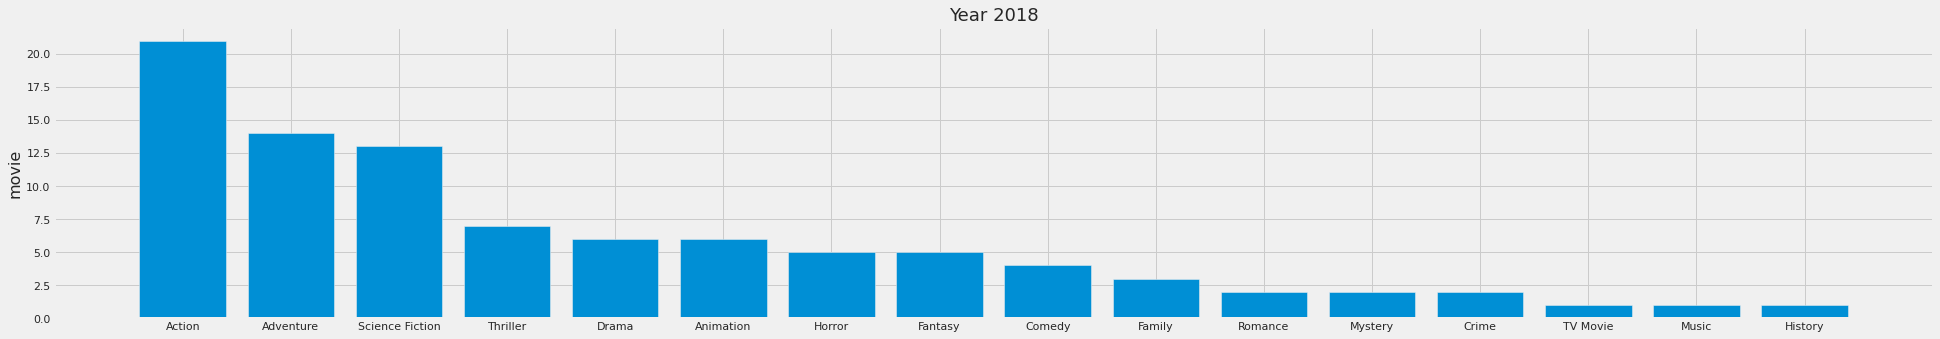

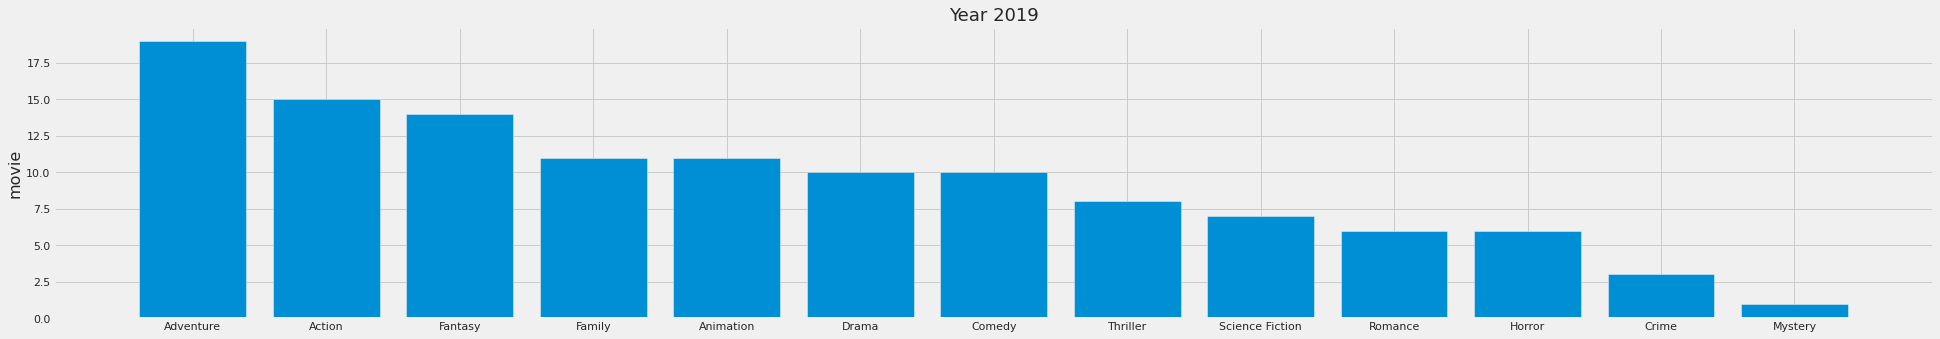

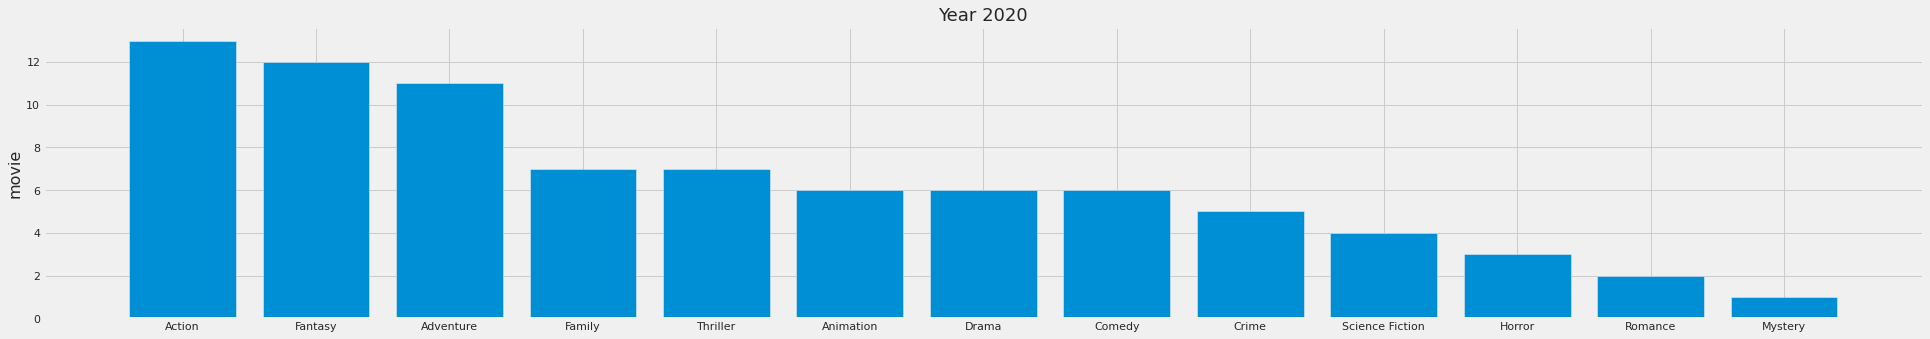

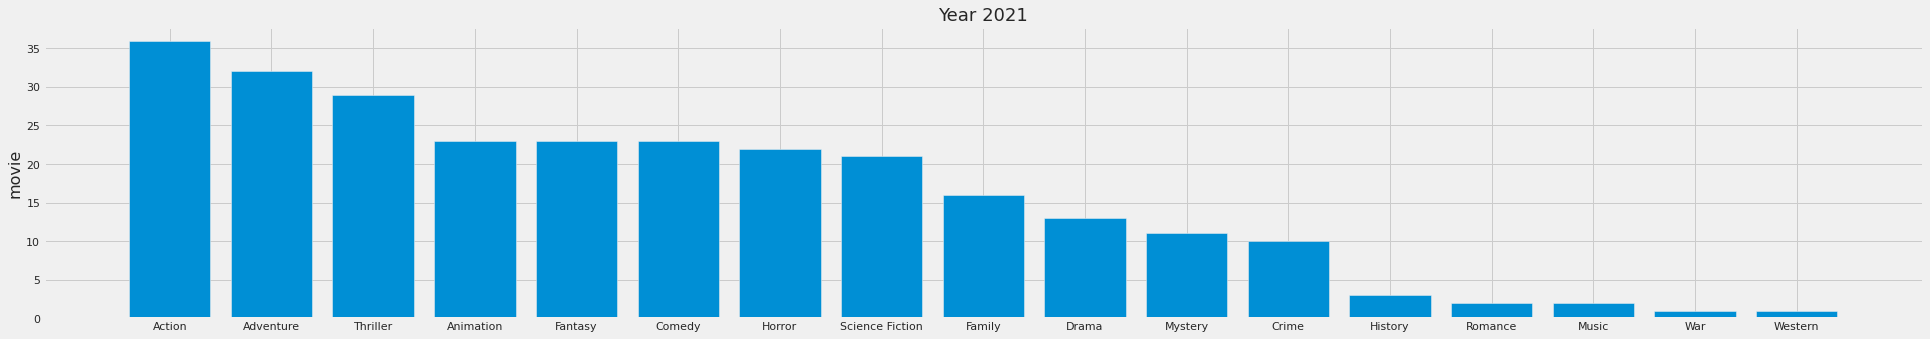

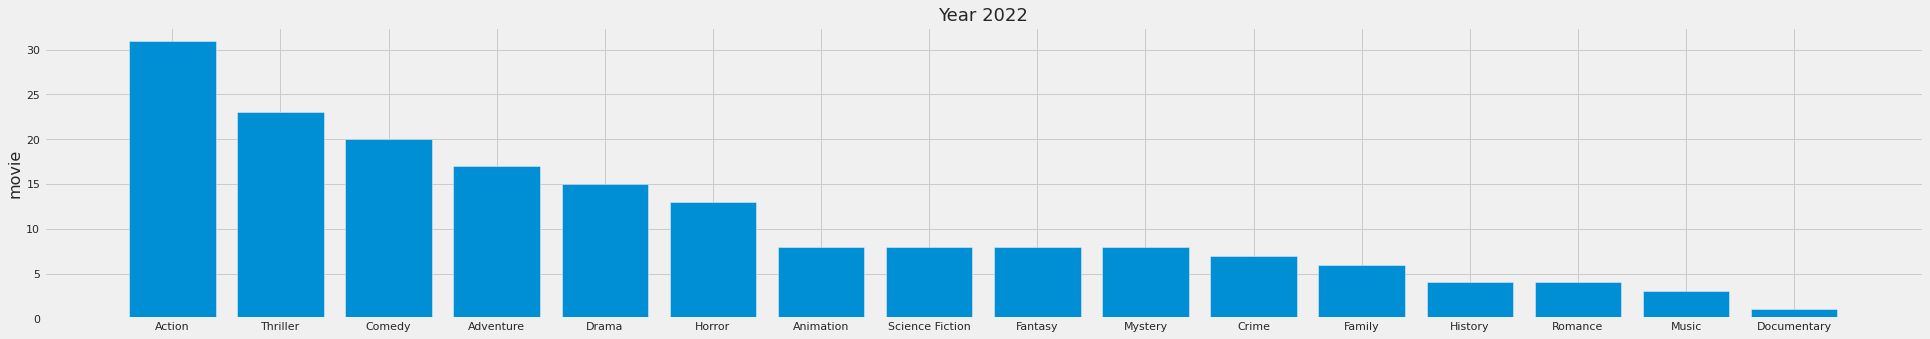

In [ ]:
# y คือ ปี 2018-2022
plt.style.use('fivethirtyeight')
for y in range(2018,2023):
  #แยกข้อมูลภาพยนตร์ในแต่ละปี
  movie_year = data.loc[data['release_year'] == y ]
  #หาจำนวนประเภทภาพยนตร์ในแต่ละปี
  genres_count = pd.Series([x for _list in movie_year['genres'] for x in _list]).value_counts()
  #กำหนดขนาดกราฟ
  fig, ax = plt.subplots(figsize = (30,5))
  #สร้างกราฟโดยกำหนดเป็นกราฟประเภท bar เพื่อให้เห็นความแตกต่างได้ชัดและกำหนดให้แกน x เป็นประเภทภาพยนตร์ แกน y เป็นจำนวนภาพยนตร์
  ax.bar(genres_count.index,genres_count.values) #ให้แกน x เป็นชื่อประเภทหนัง,แกน y เป็นจำนวนหนังของแต่ละปี
  ax.set_ylabel("movie", size = 16) #กำหนดชื่อแกน y ให้ขนาดตัวอักษรเป็น 16
  ax.set_title("Year %d"%(y), size = 18) #กำหนดชื่อแกน x ให้ขนาดตัวอักษรเป็น 18


จะเห็นได้ประเภทที่มีการผลิตมากที่สุดในทุกปี คือ Acion แต่หนังที่น่าสนใจคือหนังแนว Thriller ที่ในปี 2018 มีการผลิตหนังแนวนี้น้อยมากแต่ในปี 2022 กลับเป็นหนังแนวที่ผลิตเกือบมากที่สุด รวมถึงหนังแนว Mystery ที่ขยับขึ้นมาเยอะมากจากปี 2018

###ความสัมพันธ์ของแต่ละประเภทภาพยนต์

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

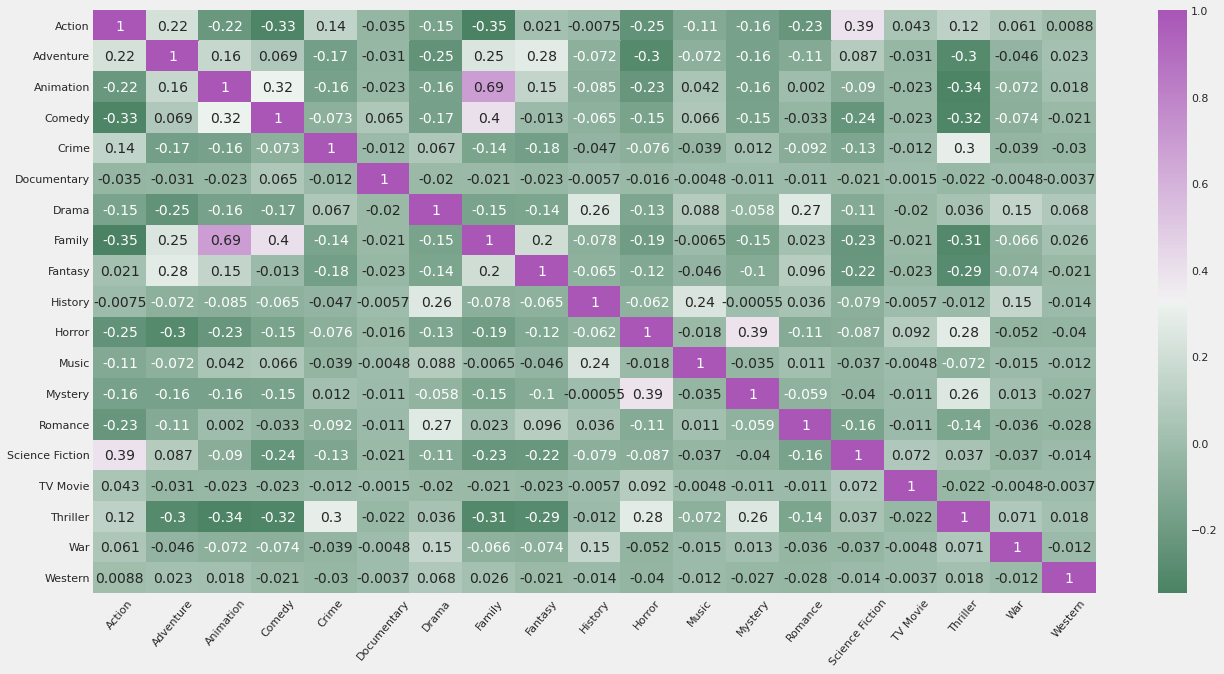

In [ ]:
#แปลงข้อมูลเป็น Boolean
gen_bool = data['genres'].str.join('|').str.get_dummies().astype(bool)
#หาค่าสัมประสิทธิ์สหสัมพันธ์ (Correlation)เพื่อใช้วิเคราะห์ความสัมพันธ์
gen_corr = gen_bool.corr(method = "pearson")
#สร้างเป็น heatmap แสดงความสัมพันธ์
fig, axe = plt.subplots(figsize = (20,10))
color = sn.diverging_palette(145, 300, s=60, as_cmap=True)
sn.heatmap(gen_corr, annot=True, cmap = color)
plt.xticks(rotation=50)

ถ้าหากค่าที่ได้มีค่า

ใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม

หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันอย่างมากในทิศทางเดียวกัน

และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน

เราจะเห็นได้ว่าความสัมพันธ์ของแต่ละประเภทภาพยนตร์มีความสัมพันธ์กันอย่างมาก แสดงถึงการสร้างภาพยนตร์มักนำหลายประเภทมาร่วมกัน

ประเภทหนึงจะมีอิทธิพลกับอีกประเภทหนึง

### ค่าเฉลี่ยคะแนนความนิยมในแต่ละประเภทภาพยนตร์

In [ ]:
#นำตารางข้อมูลมา join กับตารางข้อมูลประเภทภาพยนตร์ที่ทำเป็น boolean แยกแต่ละประเภทภาพยนตร์
gen_join = data.join(gen_bool, lsuffix='_p', rsuffix='_bool')
#สร้าง list ประเภทภาพยนตร์ที่มีทั้งหมดในข้อมูล
genres_list = ['Action'	,'Adventure',	'Animation',	'Comedy',	'Crime'	,'Documentary',	'Drama',	'Family',	'Fantasy'	,'History',	'Horror',	'Music',	'Mystery'	,'Romance',	'Science Fiction'	,'TV Movie'	,'Thriller',	'War',	'Western']
#สร้าง list เพื่อเก็บค่าเฉลี่ย reting ของหนังในแต่ละประเภทภาพยนตร์
gen_ret = []
#run gr ใน genres_list ที่เก็บชื่อประเภทหนัง
for gr in genres_list:
  #groupby ข้อมูลแล้วหาค่าเฉลี่ย rating แล้วเอาเฉพาะค่าของแถวที่เป็น True ก็คือแถวที่มีประเภทหนังนั้น
  rat = gen_join.groupby([gr])['rating'].mean()[1]
  gen_ret.append(rat)
#สร้าง Data Frame
dict_gen = {'genres': genres_list, 'rating':gen_ret}
gen_ret_frame = pd.DataFrame(dict_gen)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'rating')

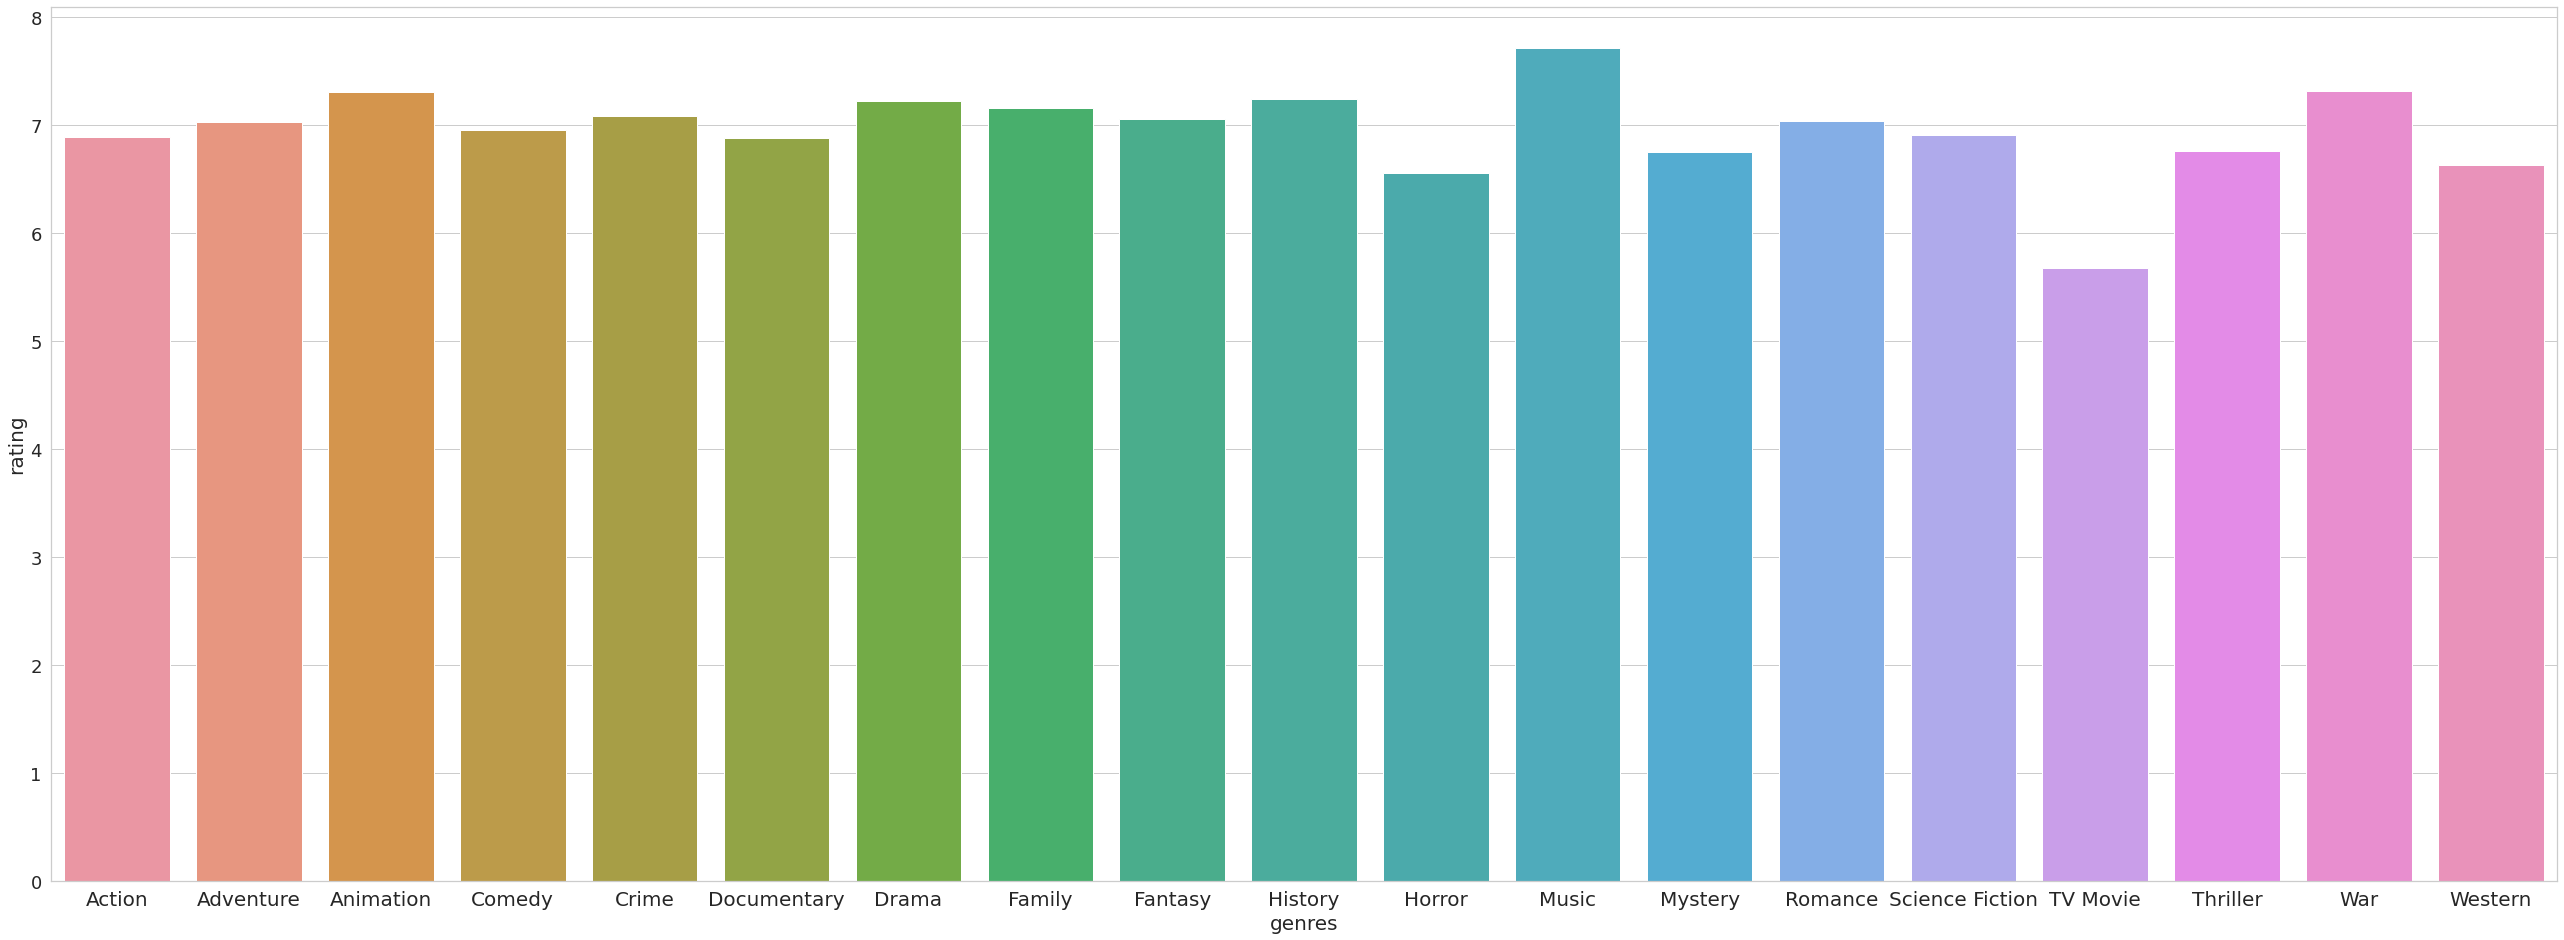

In [ ]:
#สร้าง bar chart
sn.set(style="whitegrid")
f,ax=plt.subplots(figsize=(40, 15))
#กำหนดให้แกน x เป็นประเภทภาพยนตร์ แกน y เป็นค่าเฉลี่ย rating
sn.barplot(gen_ret_frame['genres'],gen_ret_frame['rating'])
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('genres',fontsize=20)
plt.ylabel('rating',fontsize=20)

จากภาพค่าความนิยมจะมีความเท่าๆกันห่างกันไม่มาก แสดงให้เห็นว่าประเภทภาพยนตร์ไม่ใช่ปัจจัยหลักที่มีผลต่อความนิยม   

### กราฟแสดงความสัมพันธ์ระหว่างคะแนนความนิยม(rating) และ ระยะเวลาของหนัง(runtime)

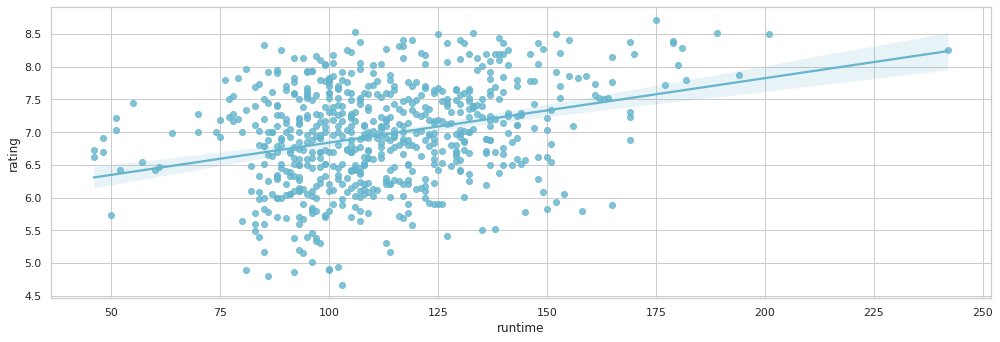

In [ ]:
#กำหนดขนาด
fig, axe = plt.subplots(figsize = (15,5))
#เลือกเป็นกราฟ regplot กำหนดให้แกน x เป็นระยะเวลาที่เล่นภาพยนตร์ แกน y เป็นค่ rating ของภาพยนตร์นั้น
sn.regplot(x=data['runtime'], y=data['rating'], color="c")
#กำหนด style ที่จะแสดง
sn.set_style("whitegrid")

จะเห็นได้ว่าระยะเวลาของหนังประมาณ 175-200 จะมี rating ที่สูงกว่าช่วงเวลาอื่น แสดงถึงช่วงระยะเวลาที่มีผลต่อความนิยม

### กราฟแสดงความสัมพันธ์ระหว่างระยะเวลาของหนัง(runtime) และ รายได้ของหนัง(revenue)

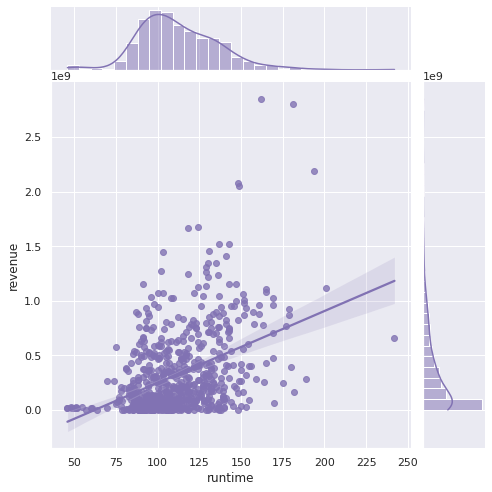

In [ ]:
#กำหนด style ที่จะแสดง
sn.set_theme(style="darkgrid")
#สร้างตัวแปรใหม่ df_run_rev โดยเก็บค่าแค่คอลัม runtime กับ revenue เท่านั้น
df_run_rev = data[['runtime', 'revenue']]
#กราฟเป็นแบบ jointplot
sn.jointplot(x="runtime", y="revenue", data=df_run_rev,kind="reg",color="m",height=7)

จะเห็นได้ว่าระยะเวลาของหนังประมาณ 150-200 จะมี revenue ที่สูงกว่าช่วงเวลาอื่น แสดงถึงช่วงระยะเวลาที่มีผลต่อรายได้ของภาพยนตร์

### ค่าเฉลี่ยของ runtime ในแต่ละไตรมาสของ 10 ปีที่ผ่านมา(2012-2022)

In [ ]:
#สร้างตารางข้อมูลเฉพาะปี 2012-2022
dt_y = data.loc[(data['release_year'] <= 2022) & (data['release_year'] >= 2012) ]
#เพิ่มคอลัมน์ไตรมาส
dt_y['release_quarter'] = pd.to_datetime(dt_y['release_date']).dt.quarter
#หาค่าเฉลี่ย runtime แต่ละไตรมาส
avg = dt_y.groupby(['release_year','release_quarter'])['runtime'].mean()
#นำข้อมูลที่ได้เข้า Data Frame
avg_frame = pd.DataFrame(avg).reset_index()
#ทำpivot data frame ในรูปแบบที่ต้องการ
df1 = avg_frame.pivot(index='release_quarter', columns='release_year', values='runtime')
#แทน missing ด้วนค่า mean
df1.fillna(value=avg_frame['runtime'].mean(), inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


release_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
release_quarter,,,,,,,,,,,
1,98.000000,89.250000,105.666667,121.142857,117.000000,115.200000,125.571429,117.333333,108.500000,111.666667,113.875000
2,108.363636,108.777778,117.800000,115.700000,124.250000,122.727273,123.125000,117.600000,115.327689,113.555556,118.625000
3,113.600000,118.666667,106.200000,114.888889,115.857143,122.090909,110.555556,110.375000,111.444444,110.862069,107.764706
4,144.750000,138.750000,118.200000,110.600000,119.875000,125.285714,113.333333,113.600000,103.333333,120.000000,115.327689


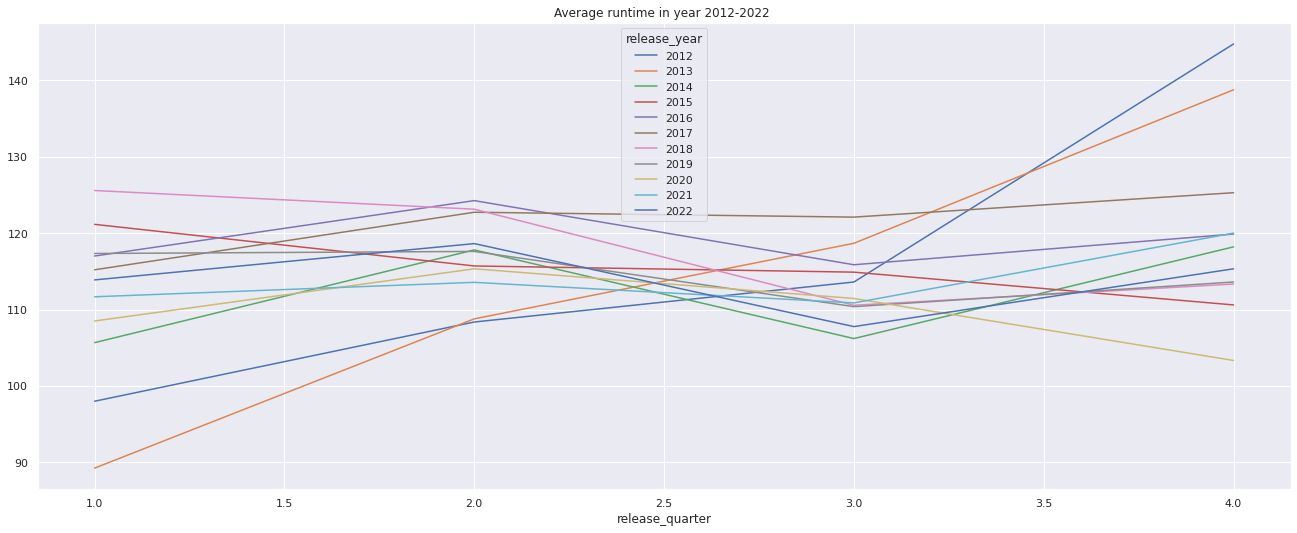

In [ ]:
#plot graph เปรียบเที่ยบแต่ละปี
df1.plot(title="Average runtime in year 2012-2022 ",figsize=(20,8))

จะเห็นได้ว่าจะแต่ละปีจะค่าเฉลี่ยของ runtime ไม่ต่างกันมากใน แต่ในช่วงไตรมาสที่ 2 จะมีแนวโน้มสูงขึ้นและในไตรมาสที่ 3 กลับมีแนวโน้มต่ำลง แสดงให้เห็นว่าช่วงกลางปีมักภาพยนตร์ที่เข้าฉายจะมีระยะเวลาสั้นกว่าช่วงอื่นของปี

### ค่าเฉลี่ยของ rating ในแต่ละไตรมาสของ 10 ปีที่ผ่านมา(2012-2022)

In [ ]:
#หาค่าเฉลี่ย rating  แต่ละไตรมาส
avg = dt_y.groupby(['release_year','release_quarter'])['rating'].mean()
#นำข้อมูลที่ได้เข้า Data Frame
avg_frame = pd.DataFrame(avg).reset_index()
#ทำpivot data frame ในรูปแบบที่ต้องการ
df2 = avg_frame.pivot(index='release_quarter', columns='release_year', values='rating')
#แทน missing ด้วนค่า mean
df2.fillna(value=avg_frame['rating'].mean(), inplace=True)

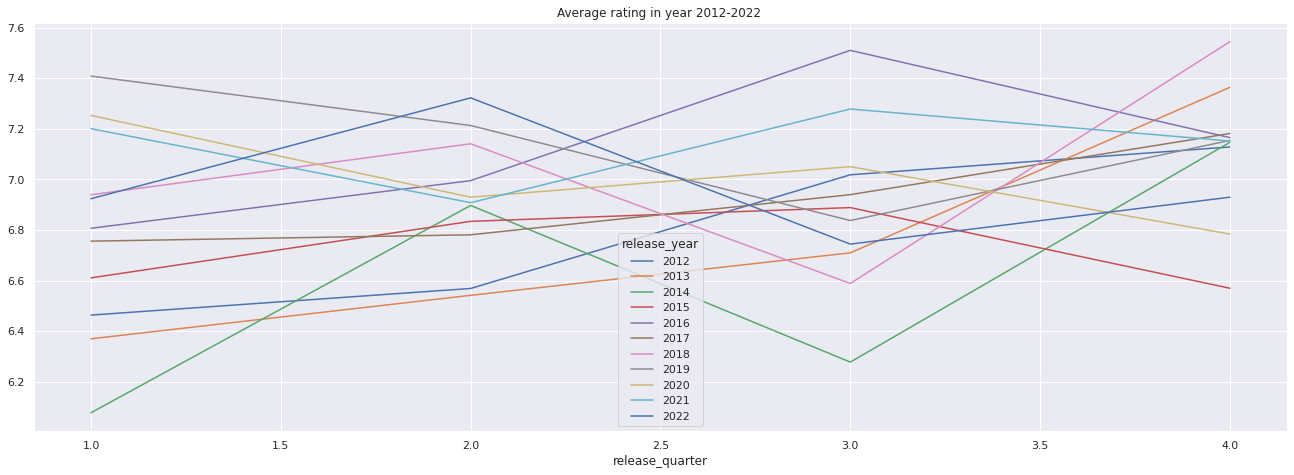

In [ ]:
#plot graph เปรียบเที่ยบแต่ละปี
df2.plot(title="Average rating in year 2012-2022 ",figsize=(20,7))

จะเห็นได้ว่าในไตรมาส 2 และ 3 มักจะมีแนวโน้มลดลงแต่ในไตรมาสที่ 4 แนวโน้มจะเพิ่มขึ้น แสดงให้เห็นว่าหนังที่มี rating ที่สูงเข้าฉายในช่วงปลายปี

### 20 อันดับคะแนนความนิยมของหนังที่มีรายได้มากที่สุด

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Title')

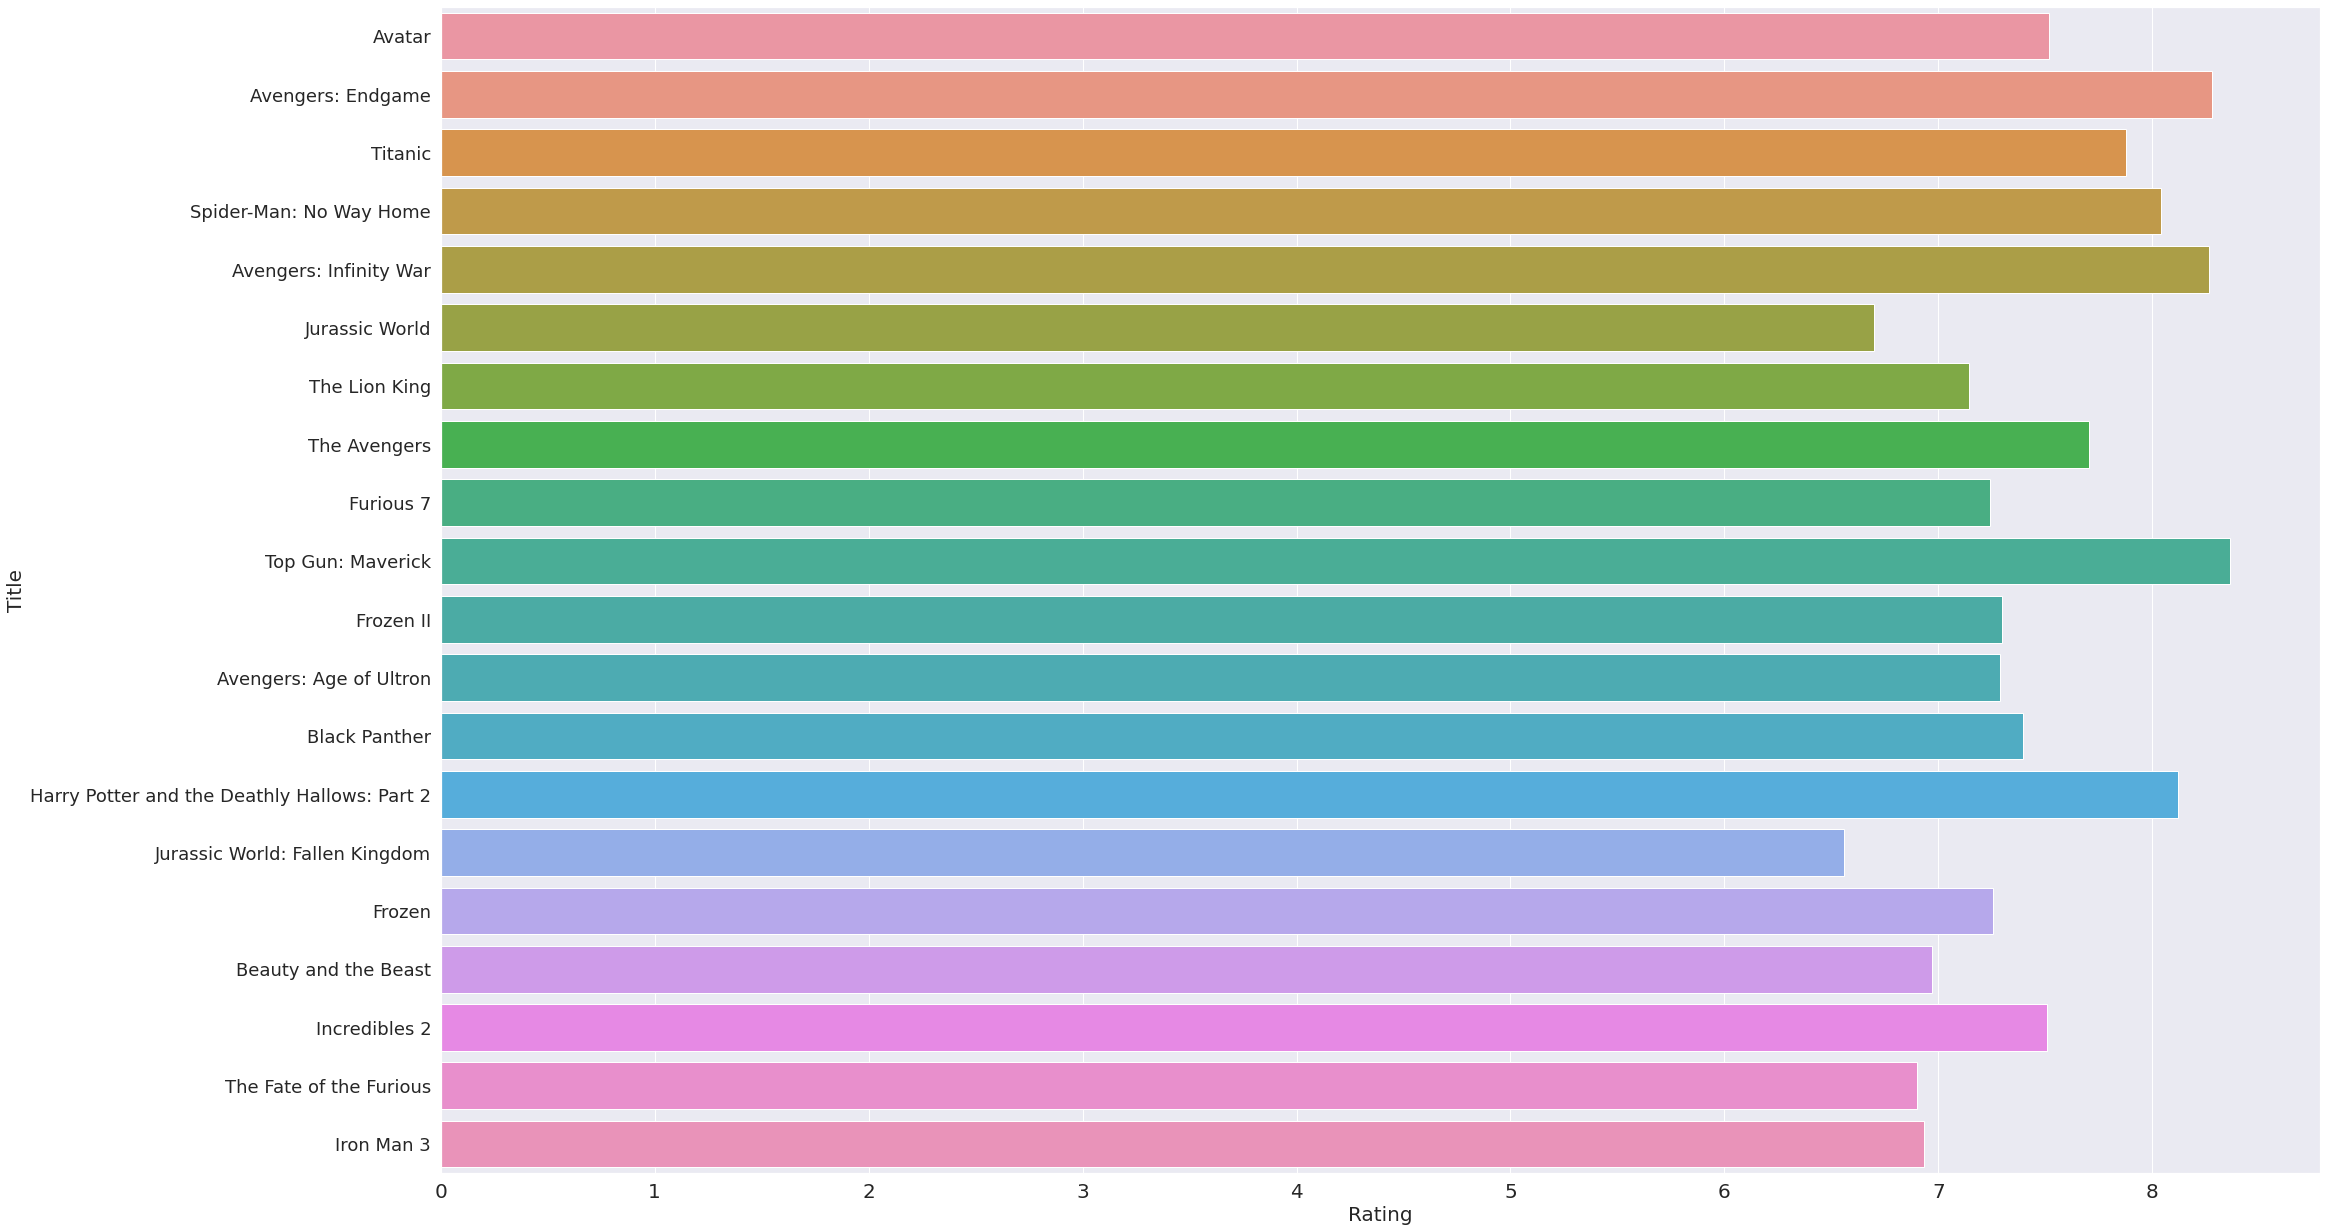

In [ ]:
#sort ข้อมูลตามคอลัมน์ revenue จากมากไปน้อย และเอาเฉพาะ 50 แถวแรก
data_sort = data.sort_values(by=['revenue'], ascending=False)[:20]
#นำข้อมูลที่ sort แล้วมาก sort ด้วย rating อีกทีเพื่อเรียงจากมากไปน้อย
data_sort.sort_values(by=['rating'], ascending=False)
#กำหนดขนาด
f,ax=plt.subplots(figsize=(30, 20))
#กำหนดให้แกน x เป็นrating ภาพยนตร์ แกน y เป็นชื่อของภาพยนตร์นั้น
sn.barplot(data_sort['rating'],data_sort['title'],orient='h')
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Title',fontsize=20)

จากภาพเห็นได้ว่าภาพยนตร์ Avatar เป็นหนังที่มีรายได้มากที่สุด แต่ภาพยนตร์ Top Gun: Maverick ซึ่งมีรายได้น้อยกว่ากลับมีคะแนนความนิยมมากกว่า

แสดงให้เห็นว่ารายได้ไม่มีผลต่อความนิยม น่าจะมีปัจจัยอื่นที่มีผลมากกว่า

### 10 อันดับรายได้ของภาพยนตร์ที่มีระยะเวลาเล่นนานที่สุด

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Title')

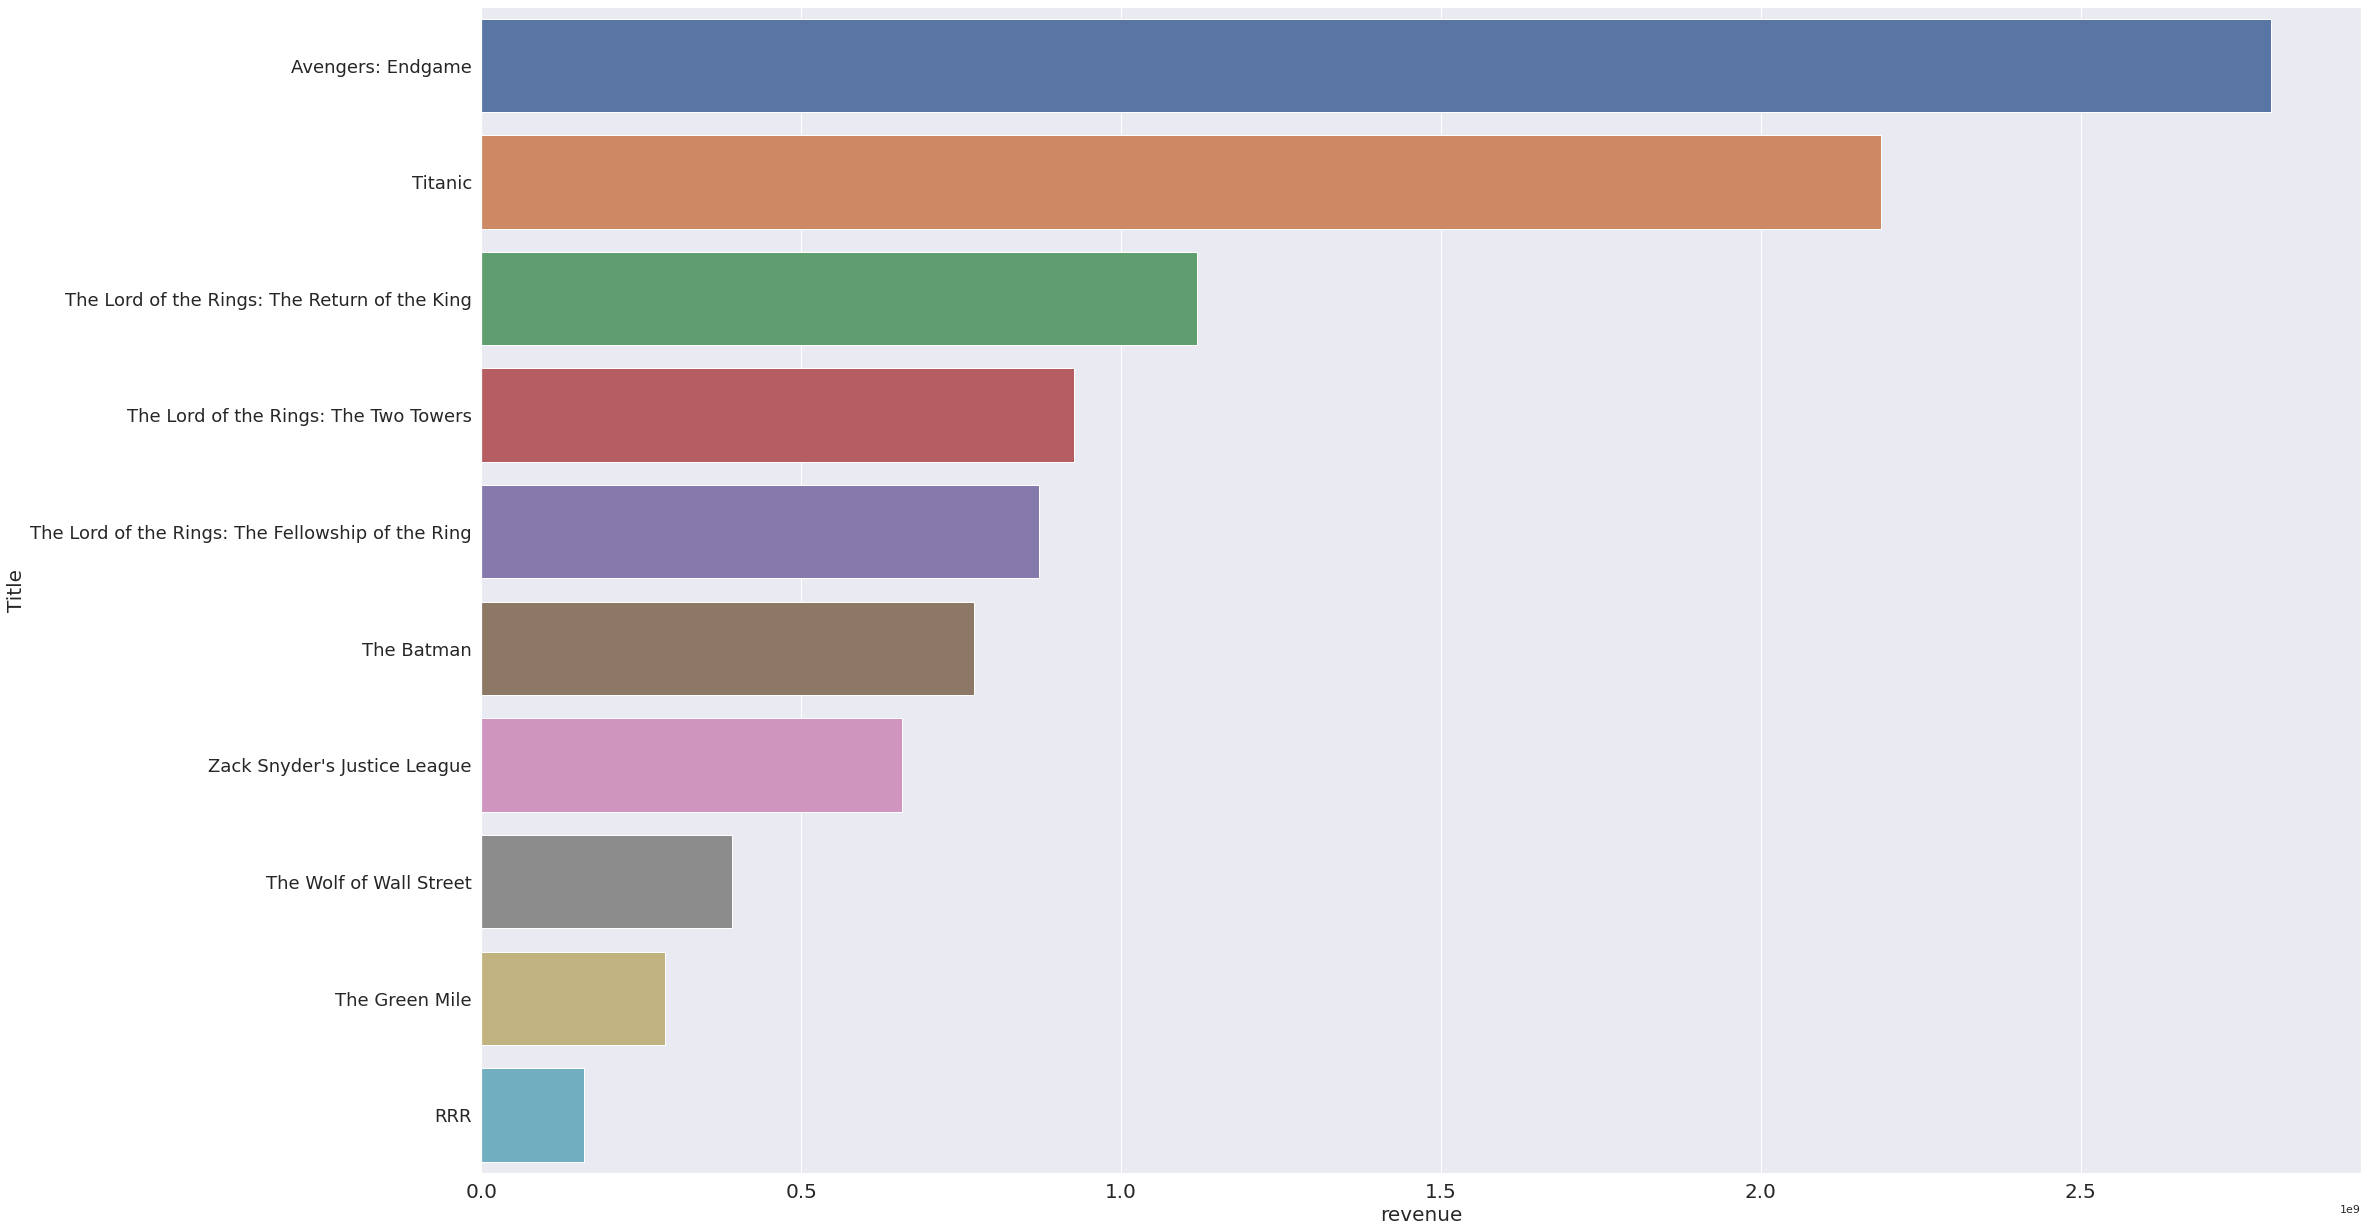

In [ ]:
#sort ข้อมูลตามคอลัมน์ runtime จากมากไปน้อย และเอาเฉพาะ 10 แถวแรก
data_sort = data.sort_values(by=['runtime'], ascending=False)[:10]
#sort ข้อมูลจาก data_sort อีกทีตามคอลัมน์ revenue จากมากไปน้อย
data_sort2 = data_sort.sort_values(by=['revenue'], ascending=False)
#กำหนดขนาด
f,ax=plt.subplots(figsize=(30, 20))
#กำหนดให้แกน x เป็นruntime ภาพยนตร์ แกน y เป็นชื่อของภาพยนตร์นั้น
sn.barplot(data_sort2['revenue'],data_sort2['title'],orient='h')
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('revenue',fontsize=20)
plt.ylabel('Title',fontsize=20)

จะเห็นได้ใน 10 ภาพยนตร์ที่มีระยะเวลาเล่นนานที่สุดมีรายได้ที่ต่างกันมาก แสดงให้เเห็นว่าระยะเวลาที่ยิ่งนานไม่มีผลกับรายได้ แต่เป็นช่วงเวลาที่เหมาะสมกับภาพยนตร์นั้นถึงจะมีรายได้ที่สูง

### 50 อันดับหนังที่มีรายได้สูงสุด

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Title')

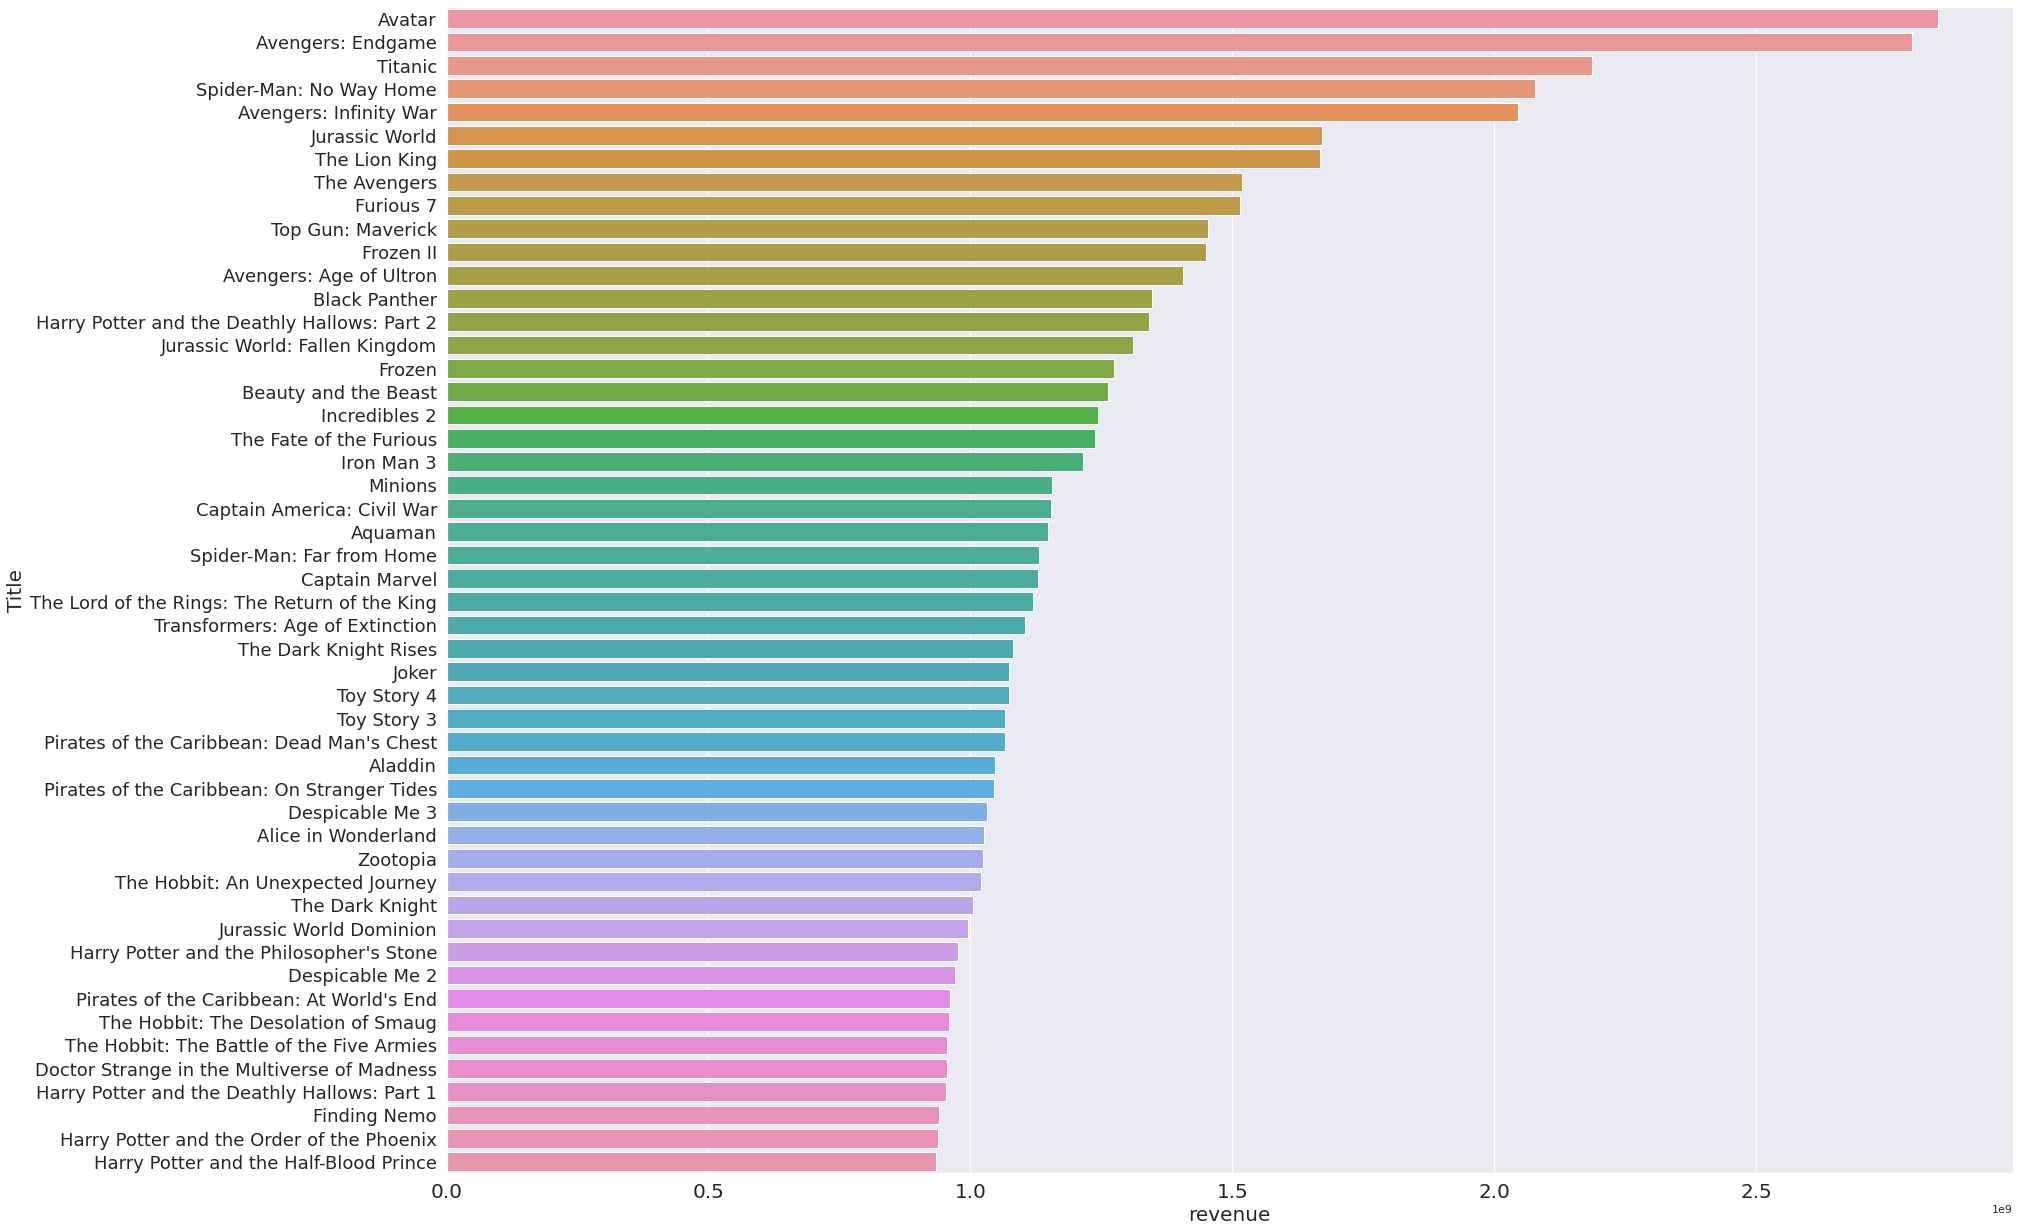

In [ ]:
#sort ข้อมูลตามคอลัมน์ revenue จากมากไปน้อย และเอาเฉพาะ 50 แถวแรก
data_sort = data.sort_values(by=['revenue'], ascending=False)[:50]
#สร้าง barplot และกำหนดค่าต่างๆ
f,ax=plt.subplots(figsize=(25, 20))
sn.barplot(data_sort['revenue'],data_sort['title'],orient='h')
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('revenue',fontsize=20)
plt.ylabel('Title',fontsize=20)

จากภาพจะเห็นได้ว่าส่วนใหญ่จะเป็นหนัง Action ฟอร์มยักษ์ทุนสร้างสูงๆ แต่จะมีหนังที่เป็น Animetion+Comedy ที่ติดอันดับเหมือนกันและหนังทั้งสองแนวนี้มีค่า Correlationเป็นค่าลบ ซึ่งสัมพันธ์มาก ทั้งที่ดูเป็นแนวตรงข้ามกัน

### Frequency genres

แสดงประเภทหนังว่าแนวไหนมีการผลิตมากที่สุด ซึ่งเห็นได้ว่ามีการผลิตภาพยนตร์ประเภท Adventure และ Action มากที่สุดอย่างเห็นได้ชัด แสดงถึงความหลากหลายในอุตสหกรรมภาพยนตร์ที่น้อย เกาะกลุ่มแค่ไม่กี่ประเภท

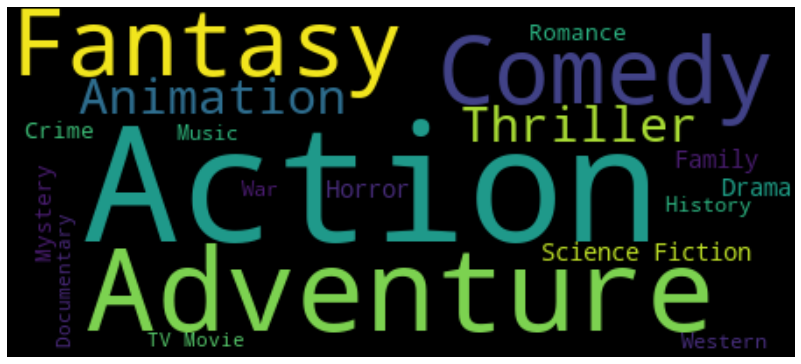

In [ ]:
#สร้างเป็น wordcloud
from wordcloud import WordCloud, STOPWORDS
f, ax = plt.subplots(figsize=(13, 6))
wordcloud = WordCloud(width=450,height=200, background_color='black',
                      max_words=20,relative_scaling=0.1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(genres_all)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 5 ประเทศที่สร้างหนังจำนวนมากที่สุด

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Country')

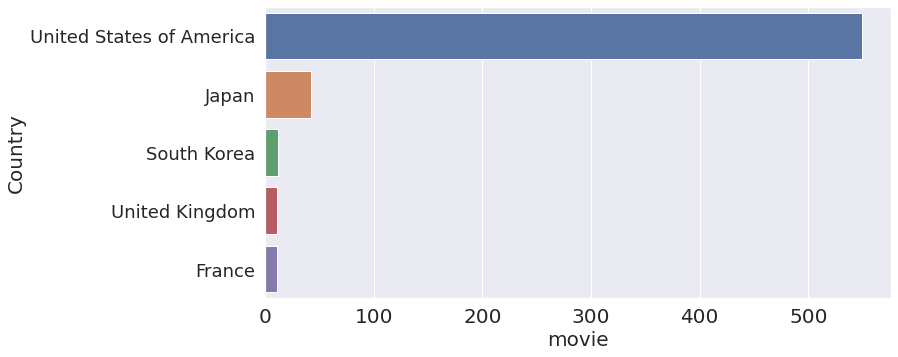

In [ ]:
#sort ค่าจาก country_count(ตัวแปรที่เก็บค่าจำนวนหนังในแต่ละประเภท) เรียงค่าจากมากไปน้อย แล้วเอาแค่ 5 อันดับแรก
country_sort = country_count.sort_values(ascending=False)[:5]
#สร้าง bar chat
f,ax=plt.subplots(figsize=(10, 5))
sn.barplot(country_sort.values,country_sort.index)
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('movie',fontsize=20)
plt.ylabel('Country',fontsize=20)

จาก bar chat ที่แสดง เราจะเห็นได้ว่าประเทศที่มีอุตสหกรรมภาพยนตร์ใหญ่ที่สุดคือ United States of America ซึ่งบ่งบอกถึงการมีทรัพยากรที่มากไม่ว่าจะเงินทุน เทคโนโลยี หรือความเป็นนานาชาติ มีผลต่อการผลิตภาพยนตร์อย่างมาก เพราะในประเทศเล็กๆจะมีข้อจำกัดทางทรัพยากรทำให้ผลิตภาพยนตร์ออกมาได้น้อย

### rating ภาพยนตร์เฉลี่ยของแต่ละประเทศ

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Country')

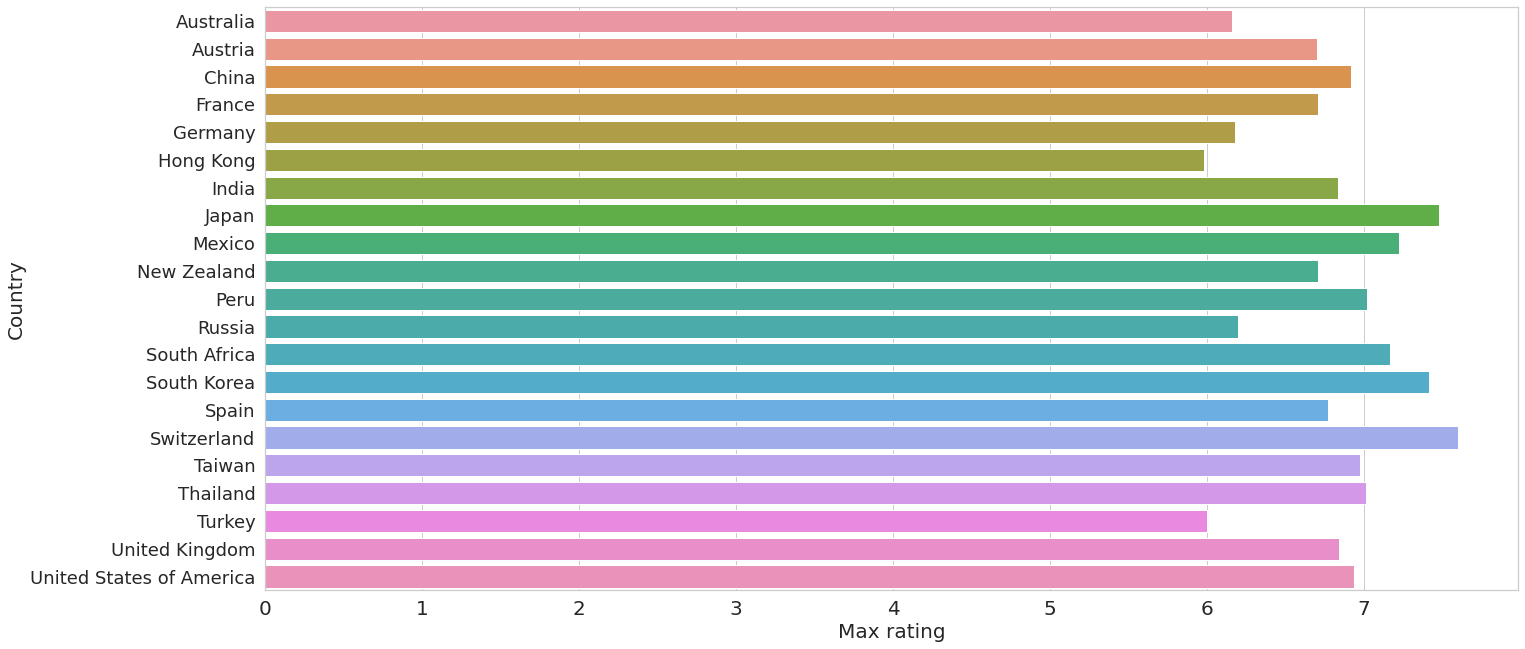

In [ ]:
#groupby ข้อมูลตามประเทศของภาพยนตร์ จากมากไปน้อย แล้วหาหนังที่ได้ rating สูงสุดของประเทศนั้น
max_rating_country =  data.groupby(['country'])['rating'].mean()
#กำหนด style ที่จะแสดง
sn.set(style="whitegrid")
#กำหนดขนาด
f,ax=plt.subplots(figsize=(20, 10))
#กำหนดให้แกน x เป็นประเทศที่ภาพยนตร์ แกน y เป็น rating สูงสุดของภาพยนตร์นั้น
sn.barplot(max_rating_country.values,max_rating_country.index,orient='h')
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('Max rating',fontsize=20)
plt.ylabel('Country',fontsize=20)

จากกราฟ 5 ประเทศที่สร้างหนังจำนวนมากที่สุด จะเห็นได้ว่าประเทศ United States of America มีอุตสาหกรรมที่ผลิตภาพยนตร์มากที่สุด แต่ในค่าเฉลี่ยความนิยมกลับน้อยกว่าบางประเทศที่อุสาหกรรมเล็กกว่ามาก แต่ก็ไม่สามารถสรุปได้ว่าประเทศกับความนิยมไม่มีผลต่อกัน เพราะอาจเป็นที่มีตัวหารมากของค่าเฉลี่ย ที่ทำให้น้อยกว่า

### 10 อันดับประเทศที่มีหนังที่รายได้สูงสุด

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Country')

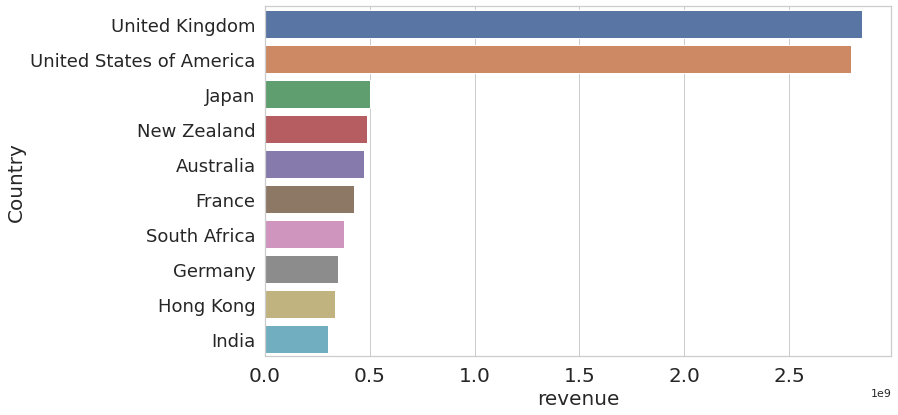

In [ ]:
#sort ข้อมูลตามคอลัมน์ revenue จากมากไปน้อย
rev_sort = data.sort_values(by=['revenue'], ascending=False)
#groupby ข้อมูลตามประเทศแล้วเอาเฉพาระแถวแรกของแต่ละประเทศ เพื่อให้ได้หนังที่มีรายได้สูงสุดของแต่ละประเทศ
coun_sort = rev_sort.groupby('country').first()
#นำข้อมูลที่ fitter ได้มา sort รายได้จากมากไปน้อยอีกที
top_10 = coun_sort.sort_values(by=['revenue'], ascending=False)[:10]
#สร้าง barplot และกำหนดค่าต่างๆ
f,ax=plt.subplots(figsize=(10, 6))
sn.barplot(top_10['revenue'],top_10.index,orient='h')
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.xlabel('revenue',fontsize=20)
plt.ylabel('Country',fontsize=20)

จากภาพประเทศที่มีหนังที่ทำรายได้สูงที่สุด คือ United Kingdom ซึ่งจะเห็นได้ว่าประเทศที่ใหญ่ มีวัฒนธรรมที่รู้จักแพร่หลาย จะยิ่งได้รับความสนใจและการยอมรับในการเลือกดูภาพยนตร์มากกว่าประเทศที่มีวัฒธรรมที่เฉพาะกว่า